In [ ]:
import pandas as pd
import random as random
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
random.seed(1301204068)

# Import Data

In [ ]:
data = pd.read_csv("https://raw.githubusercontent.com/mughidaf/CaseBased2/main/Country-data.csv")
data

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [ ]:
Nama_negara = data.iloc[:,:1]
Nama_negara

,country
0,Afghanistan
1,Albania
2,Algeria
3,Angola
4,Antigua and Barbuda
...,...
162,Vanuatu
163,Venezuela
164,Vietnam
165,Yemen


In [ ]:
data = data.iloc[:,1:]
data

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...
162,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


# Mengecek apakah ada missing value atau tidak

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   child_mort  167 non-null    float64
 1   exports     167 non-null    float64
 2   health      167 non-null    float64
 3   imports     167 non-null    float64
 4   income      167 non-null    int64  
 5   inflation   167 non-null    float64
 6   life_expec  167 non-null    float64
 7   total_fer   167 non-null    float64
 8   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2)
memory usage: 11.9 KB


# Cek variansi dari kolom ke-2 sampai terakhir

In [ ]:
i = 1
while i < len(data.columns) : 
  print(data.iloc[:,i].std())
  i += 1

27.41201011142416
2.7468374978890795
24.209588976108698
19278.067697657672
10.570703901430559
8.893171908900408
1.5138475432630463
18328.704808675564


# Pemadatan data

In [ ]:
pca = PCA(2)
pca.fit_transform(data.iloc[:,:].T)
data = pd.DataFrame(pca.components_.T,columns = [0,1])
data

,0,1
0,0.003578,-0.007767
1,0.023621,-0.041362
2,0.029452,-0.061658
3,0.015552,-0.014390
4,0.051860,-0.039247
...,...,...
162,0.009523,0.003998
163,0.049136,-0.006383
164,0.009802,-0.023753
165,0.009807,-0.023663


# Normalisasi data

In [ ]:

Scaler = preprocessing.MinMaxScaler(feature_range=(0,1))
data = Scaler.fit_transform(data)
data = pd.DataFrame(data)
data

,0,1
0,0.006598,0.508619
1,0.068366,0.458003
2,0.086337,0.427424
3,0.043500,0.498641
4,0.155396,0.461190
...,...,...
162,0.024921,0.526346
163,0.147001,0.510705
164,0.025781,0.484534
165,0.025794,0.484669


In [ ]:
arrData = []
for i in range(len(data)) : 
  temp = []
  for j in range(0,len(data.columns)) : 
    temp.append(data[j][i])
  arrData.append(temp)

#Membuat fungsi jarak menggunakan manhattan



In [ ]:
def jarak(a,b) : 
  hasil = 0
  for i in range(len(a)) : 
    hasil += abs(a[i]-b[i])
  return hasil

# **DBSCAN**

Menentukan minPts dan Eps

In [ ]:
minPts = 10
Eps = 0.3

Menentukan core point

In [ ]:
corePoint = []
for i in range(len(arrData)) : 
  pts = 0
  for j in range(len(arrData)) : 
    if i != j :
      if jarak(arrData[i],arrData[j]) <= Eps : 
        pts += 1
  if pts >= minPts : 
    corePoint.append(arrData[i])
print(len(corePoint))

157


Menambah field pada array yang nantinya akan diisi untuk menentukan termasuk kelas yang mana data tersebut

In [ ]:
for i in range(len(arrData)) : 
  arrData[i] = [arrData[i],0] #diisi dengan 0 sebagai tanda bahwa data tersebut belum masuk ke kelas manapun
print(arrData[0])

[[0.006597956727736502, 0.5086189989809378], 0]


Memulai clustering data

In [ ]:
Cluster = 1
while len(corePoint) > 0 : 
  indexCore = random.randint(0,len(corePoint)-1)
  core = corePoint[indexCore]
  corePoint.remove(core)
  i = 0
  tempCores = []
  while i < len(arrData) : 
    if arrData[i][1] == 0 : 
      if jarak(arrData[i][0],core) <= Eps : 
        arrData[i][1] = Cluster
        if arrData[i][0] in corePoint : 
          corePoint.remove(arrData[i][0]) #menghapus corePoint yang sudah memiliki cluster
          tempCores.append(arrData[i][0])
    i += 1
  while len(tempCores) > 0 :
    core = tempCores[0]
    tempCores.remove(core)
    while i < len(arrData) : 
      if arrData[i][1] == 0 : 
        if jarak(arrData[i][0],core) <= Eps : 
          arrData[i][1] = Cluster
          if arrData[i][0] in corePoint : 
            corePoint.remove(arrData[i][0]) #menghapus corePoint yang sudah memiliki cluster
            tempCores.append(arrData[i][0])
      i += 1
  Cluster += 1


Mengembalikan data agar menjadi dataframe lagi

In [ ]:
temp = []
for i in range(len(arrData)) :
  temp2 = []
  for j in range(len(arrData[i][0])) : 
    temp2.append(arrData[i][0][j])
  temp2.append(arrData[i][1])
  temp.append(temp2)

for k in range(len(Nama_negara)) : 
    temp[k].insert(0,Nama_negara['country'][k])
df = pd.DataFrame(temp,columns = ['country'	,0,1,'class'])
df


,country,0,1,class
0,Afghanistan,0.006598,0.508619,1
1,Albania,0.068366,0.458003,1
2,Algeria,0.086337,0.427424,1
3,Angola,0.043500,0.498641,1
4,Antigua and Barbuda,0.155396,0.461190,1
...,...,...,...,...
162,Vanuatu,0.024921,0.526346,1
163,Venezuela,0.147001,0.510705,1
164,Vietnam,0.025781,0.484534,1
165,Yemen,0.025794,0.484669,1


Visualisasi data

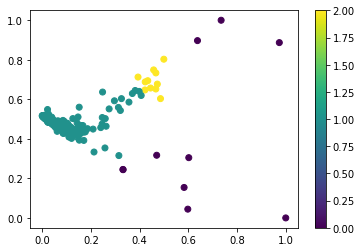

In [ ]:

plt.scatter(df[0],df[1],c = df['class'])
plt.colorbar()
plt.show()